In [1]:
import numpy as np# Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
plt.style.use('default')

## 1. Описание задачи
***

Данными для задачи является набор объявлений о продаже `423857` поддержанных автомобилей на территории США. Данные собраны с портала Craigslist.org - самой большой в мире коллекции подержанных автомобилей 


##### Постановка задачи:
С помощью методов машинного обучения, научить модель определять `condition` - состояние машины:

| Состояние | Описание на русском | 
| ---- | ---- |
| 'excellent' | превосходное, уникальное |
| 'new' | новое, но без изысков |
| 'like new' | с пробегом, но работает как новая |
| 'good' | хорошее |
| 'fair' | удовлетворительное |
| 'salvage' | неудовлетворительное |



## 2. Чтение и разбор данных
***

In [2]:
url = "vehicles.csv"
full_data = pd.read_csv(url) # Читаем данные

In [3]:
full_data.shape # Получаем размерность данных

(423857, 25)

##### Обзор данных и их типов:
1. `id` - уникальный номер объявления, `номинальный`	
2. `url` - ссылка на объявление о продаже, `номинальный`	
3. `region` - регион продажи автомобиля, `номинальный`	
4. `region_url` - ссылка на домен региона продажи, `номинальный`	
5. `price` - стоимость машины в долларах, `количественный`	
6. `year` - год выпуска машины, `номинальный`	
7. `manufacturer` - марка машины, `номинальный`	
8. `model` - модель машины, `номинальный`	
9. `condition` - состояние машины, `номинальный`	
10. `cylinders` - количество цилиндров в двигателе, `номинальный`	
11. `fuel` - тип двигателя, `номинальный`	
12. `odometer` - пробег, `количественный`	
13. `title_status` - официальный статус в государственном реестре 
(чистая, в залоге, угнана, только на запчасти, востановленная, металлолом), `номинальный`
14. `transmission` - тип коробки передач, `номинальный`	
15. `vin` - уникальный идентификационный номер машины, `номинальный`	
16. `drive` - тип привода (передний, задний, 4x4), `номинальный`	
17. `size` - габариты машины, `номинальный`	
18. `type` - тип кузова, `номинальный`	
19. `paint_color` - цвет машины, `номинальный`	
20. `image_url` - сслыка на фотографию, `номинальный`	
21. `description` - мета-тег дескриптор страницы объявления, `номинальный`
22. `county` - страна продажи автомобиля, `номинальный`
23. `state` - штат продажи автомобиля, `номинальный`	
24. `lat` - широта, `количественный`	
25. `long` - долгота, `количественный`

In [4]:
full_data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

##### Обзор данных:

С помощью метода `Dataframe.describe()` библиотеки `pandas`, осмотрим наши столбцы данных на наличе пустых столбов, аномалий или закономерностей
###### Для номинальных признаков
`count` - количество значений 

`unique` - количество уникальных значений в каждом столбце

`top` - самое распространенное значение

`freq` - частота наиболее распространенного значения

###### Для количественных признаков:
`mean` - Среднее арифметическое

`std` - Стандартное отклонение

`min` - Минимальное значение

`25%` - Квартиль уровня (1/4)

`50%` - Медиана

`75%` - Квартиль уровня (3/4)

`max` - Максимальное значение

In [5]:
full_data.iloc[:,:15].describe(include="all")

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin
count,4.238570e+05,423857,423857,423857,4.238570e+05,328743.000000,313242,325384,176719,197679,327214,2.705850e+05,327759,328065,184420
unique,NaN,423857,404,413,NaN,NaN,43,27042,6,8,5,NaN,6,3,103588
top,NaN,https://tulsa.craigslist.org/ctd/d/tulsa-2002-...,columbus,https://salem.craigslist.org,NaN,NaN,ford,f-150,excellent,6 cylinders,gas,NaN,clean,automatic,1HTMRAAM19J040080
freq,NaN,1,3296,2985,NaN,NaN,59786,6073,85254,70130,286775,NaN,315607,292619,133
mean,7.190602e+09,NaN,NaN,NaN,5.779437e+04,2009.827358,NaN,NaN,NaN,NaN,NaN,9.942578e+04,NaN,NaN,NaN
std,5.159269e+06,NaN,NaN,NaN,1.002581e+07,10.135809,NaN,NaN,NaN,NaN,NaN,1.204833e+05,NaN,NaN,NaN
min,7.178302e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,7.186688e+09,NaN,NaN,NaN,4.499000e+03,2007.000000,NaN,NaN,NaN,NaN,NaN,4.432400e+04,NaN,NaN,NaN
50%,7.192068e+09,NaN,NaN,NaN,9.995000e+03,2012.000000,NaN,NaN,NaN,NaN,NaN,9.174900e+04,NaN,NaN,NaN
75%,7.194909e+09,NaN,NaN,NaN,1.899500e+04,2016.000000,NaN,NaN,NaN,NaN,NaN,1.372370e+05,NaN,NaN,NaN


In [6]:
full_data.iloc[:,15:].describe(include="all")

,drive,size,type,paint_color,image_url,description,county,state,lat,long
count,231119,102627,241157,222203,329661,329654,0.0,423857,324404.000000,324404.000000
unique,3,4,13,12,222413,275765,NaN,51,NaN,NaN
top,4wd,full-size,sedan,white,https://images.craigslist.org/00H0H_lwWjXSEWNa...,VISIT OUR WEBSITE WWW.DIRECTDETAILOFOH.COM HTT...,NaN,ca,NaN,NaN
freq,99347,52820,64842,57646,2106,144,NaN,45798,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.731429,-93.949367
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.902977,17.930566
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80.386400,-161.394000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.054500,-106.678000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.366900,-88.009900
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.517075,-80.832500


* Благодаря такой проверке был обнаружен пустой столбец - `county`, который мы исключим из данных при дальнейшей работе


* Самое встречаемое значение наших классов состояния машин - `excellent`, количество непропущенных строк даных - `176719`, а частота входжения - `85254`, что составляет - `48%` значений всего класса, а значит наши классы по этому столбцу - сбалансированны 
(при условии что баланс считаем нарушенным если, один класс занимает более 75% от класса)

* Так же видно что данные содержат пропущенные значения в некоторых столбцах

## 3 Визуализация данных и описательная статистика
***

Рассмотрим диаграмму по двум количественным признакам - цене от пробегу автомобиля, предполагаем что эти данные зависимы т.к с ростом пробега, будет уменьшатся цена автомобиля

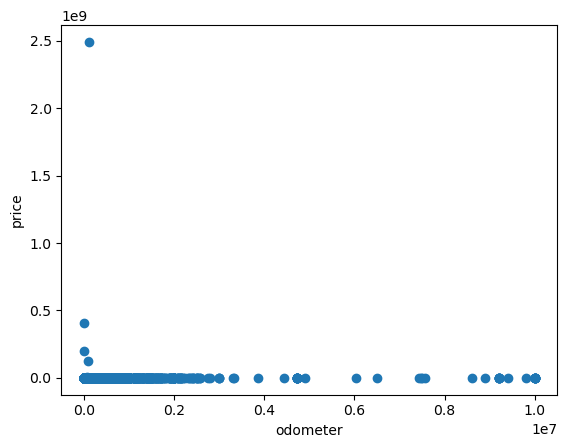

In [7]:
plt.scatter(full_data['odometer'], full_data['price']) 
plt.xlabel('odometer')
plt.ylabel('price')
pass

Видим большие выбросы, не дающие адекватно рассмотреть диаграмму рассеивания от наших двух признаков, попробуем рассмотреть диаграмму на рандомной выборке для 1000 объектов

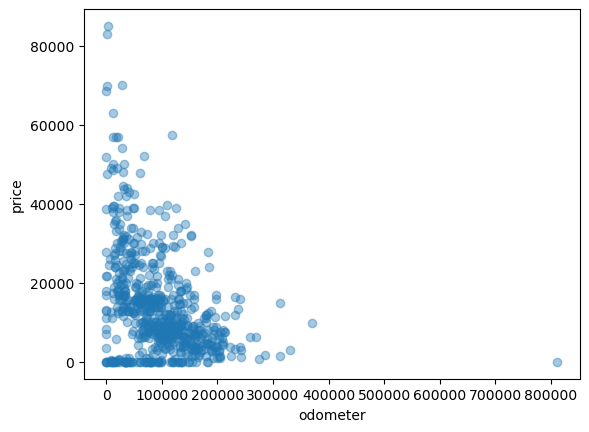

In [8]:
np.random.seed(73)
random_subset = np.random.choice(np.arange(full_data.shape[0]), size=1000, replace=False)

plt.scatter(full_data.iloc[random_subset]['odometer'], full_data.iloc[random_subset]['price'], alpha=0.4)
plt.xlabel('odometer')
plt.ylabel('price')
pass

Видим, что большие величины выбросов не дают возможность адекватно отрисовать диаграмму, а значит для дальнейшей работы над визуализацией нам нужно очистить данные от выбросов, и заодно избавиться от пустого столбца, обнаруженного на этапе чтения данных. 

##### Обнаружение и очистка от выбросов: 
Для обнаружения выбросов найдем, квантили для признаков `odometer` и `price`

In [9]:
full_data['price'].quantile([0.005,.01,.05,.080,.09,.1,.5,.9,.95,.99,.995])

0.005        0.00
0.010        0.00
0.050        0.00
0.080        0.00
0.090      146.04
0.100      389.60
0.500     9995.00
0.900    31500.00
0.950    39950.00
0.990    61500.00
0.995    71995.00
Name: price, dtype: float64

In [10]:
full_data['price'].max()

3808256046

Рассмотрим квартили уровней 0.005 - 0.080, которые говорят что около $7.5\%$ машин - "бесплатные", эти данные нам нужноо отсечь

Для работы возьмем интервал от 0.090 до 0.995 - это $90.5\%$ данных

In [11]:
full_data['odometer'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005         0.0
0.010        10.0
0.050     10081.0
0.100     20292.0
0.500     91749.0
0.900    179744.0
0.950    205554.2
0.990    275961.2
0.995    330000.0
Name: odometer, dtype: float64

In [12]:
full_data['odometer'].max()

10000000.0

Аналогично рассматриваем данные о пробеге автомобиля. В данном случае пробег у машины может быть нулевой если она новая, и такие данные уже будут адекватно вписываться в модель обучения. Их исключать мы не будем, и возьмем $99.0\%$ данных, с пробегами в промежутках от `0км` до `330'000км`

Создадим новую переменную `clear_data` - куда занесем только очищенные данные

In [13]:
rows_to_drop = full_data[
    (full_data['price'] < full_data['price'].quantile(0.090)) | (full_data['price'] > full_data['price'].quantile(0.995)) | 
    (full_data['odometer']  < full_data['odometer'].quantile(0.005)) | (full_data['odometer']  > full_data['odometer'].quantile(0.995))].index
clear_data = full_data.drop(rows_to_drop)

del clear_data['county']

clear_data.shape

(382286, 24)

Проверим, как теперь будет выглядеть диаграмма, которую мы отрисовывали выше

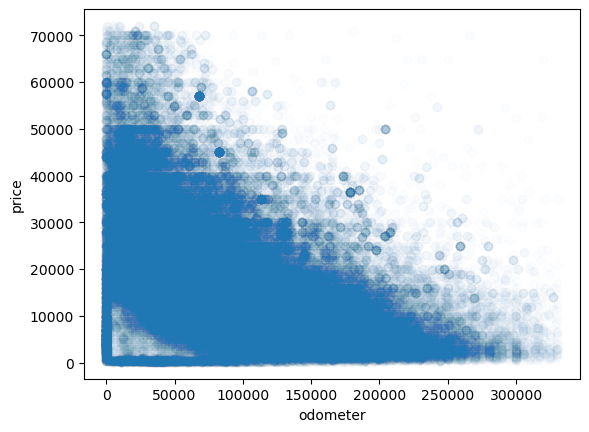

In [14]:
plt.scatter(clear_data['odometer'], clear_data['price'], alpha = 0.01) 
plt.xlabel('odometer')
plt.ylabel('price')
pass

Теперь диаграмма рассеивания выглядит адекватно, мы видим линейную зависимость уменьшения цены, при увеличении пробега автомобиля, но данных довольно много из-за чего сложно понять где большее или меньшее скопление точек, отрисуем более наглядный вариант диаграммы с меньшим числом объектов

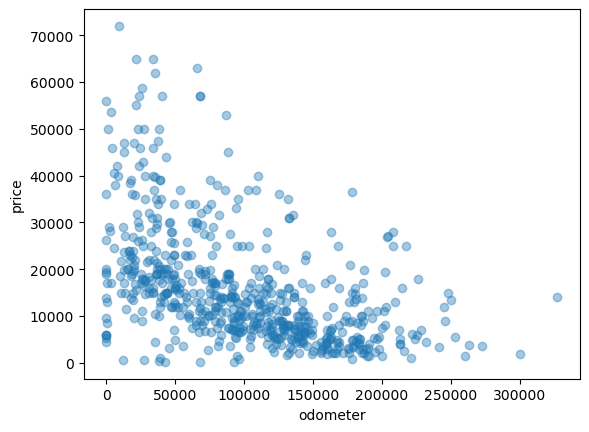

In [15]:
np.random.seed(73)
random_subset = np.random.choice(np.arange(clear_data.shape[0]), size=1000, replace=False)

plt.scatter(clear_data.iloc[random_subset]['odometer'], clear_data.iloc[random_subset]['price'], alpha=0.4)
plt.xlabel('odometer')
plt.ylabel('price')
pass

##### Визуализация данных

Теперь, когда мы очистили данные, попробуем визуализировать зависимость признака по которому мы собираемся классифицировать данные, от различных других признаков
За состояние автомобиля будет отвечать цвет, за год выпуска - размер, а так же оставим для осей ординат и абцисс - стоимость и пробег соотвественно

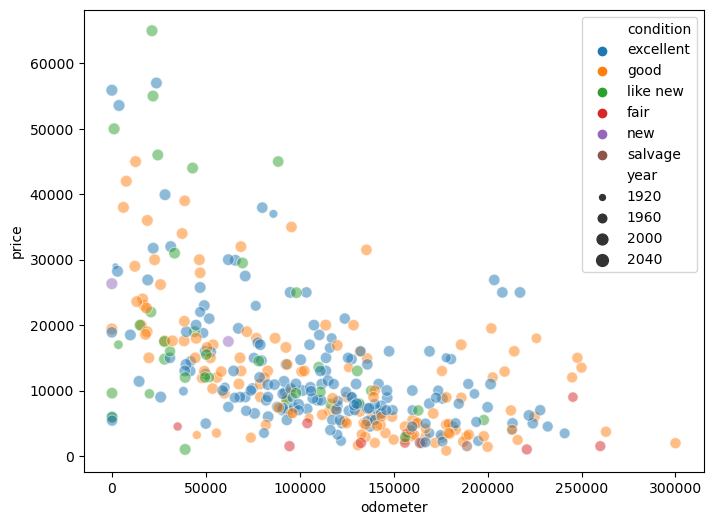

In [16]:
np.random.seed(73)
random_subset = np.random.choice(np.arange(clear_data.shape[0]), size=1000, replace=False)
plt.figure(figsize = (8, 6))
sns.scatterplot(x='odometer', y='price', size='year', hue='condition', data=clear_data.iloc[random_subset], alpha=0.5)
pass

* Наблюдается ожидаемая корреляция между пробегом и стоимостью автомобия

* Так же видим что машины состояния `fair` - удовлетворительно и `salvage` - неудовлетворительно, находятся по стоимости в районе менее `10'000$`, и наоборот самые дорогие машины, чаще всего в состоянии `excelent` и `like new`

* Машин 1950г и ранее - на диаграмме почти нет

* Почти все машины из класса `like new` - имеют пробег не более `150'000км` -  `200'000км`

Построим все возможные диаграммы рассеивания для каждой пары переменных, на небольшой выборке:

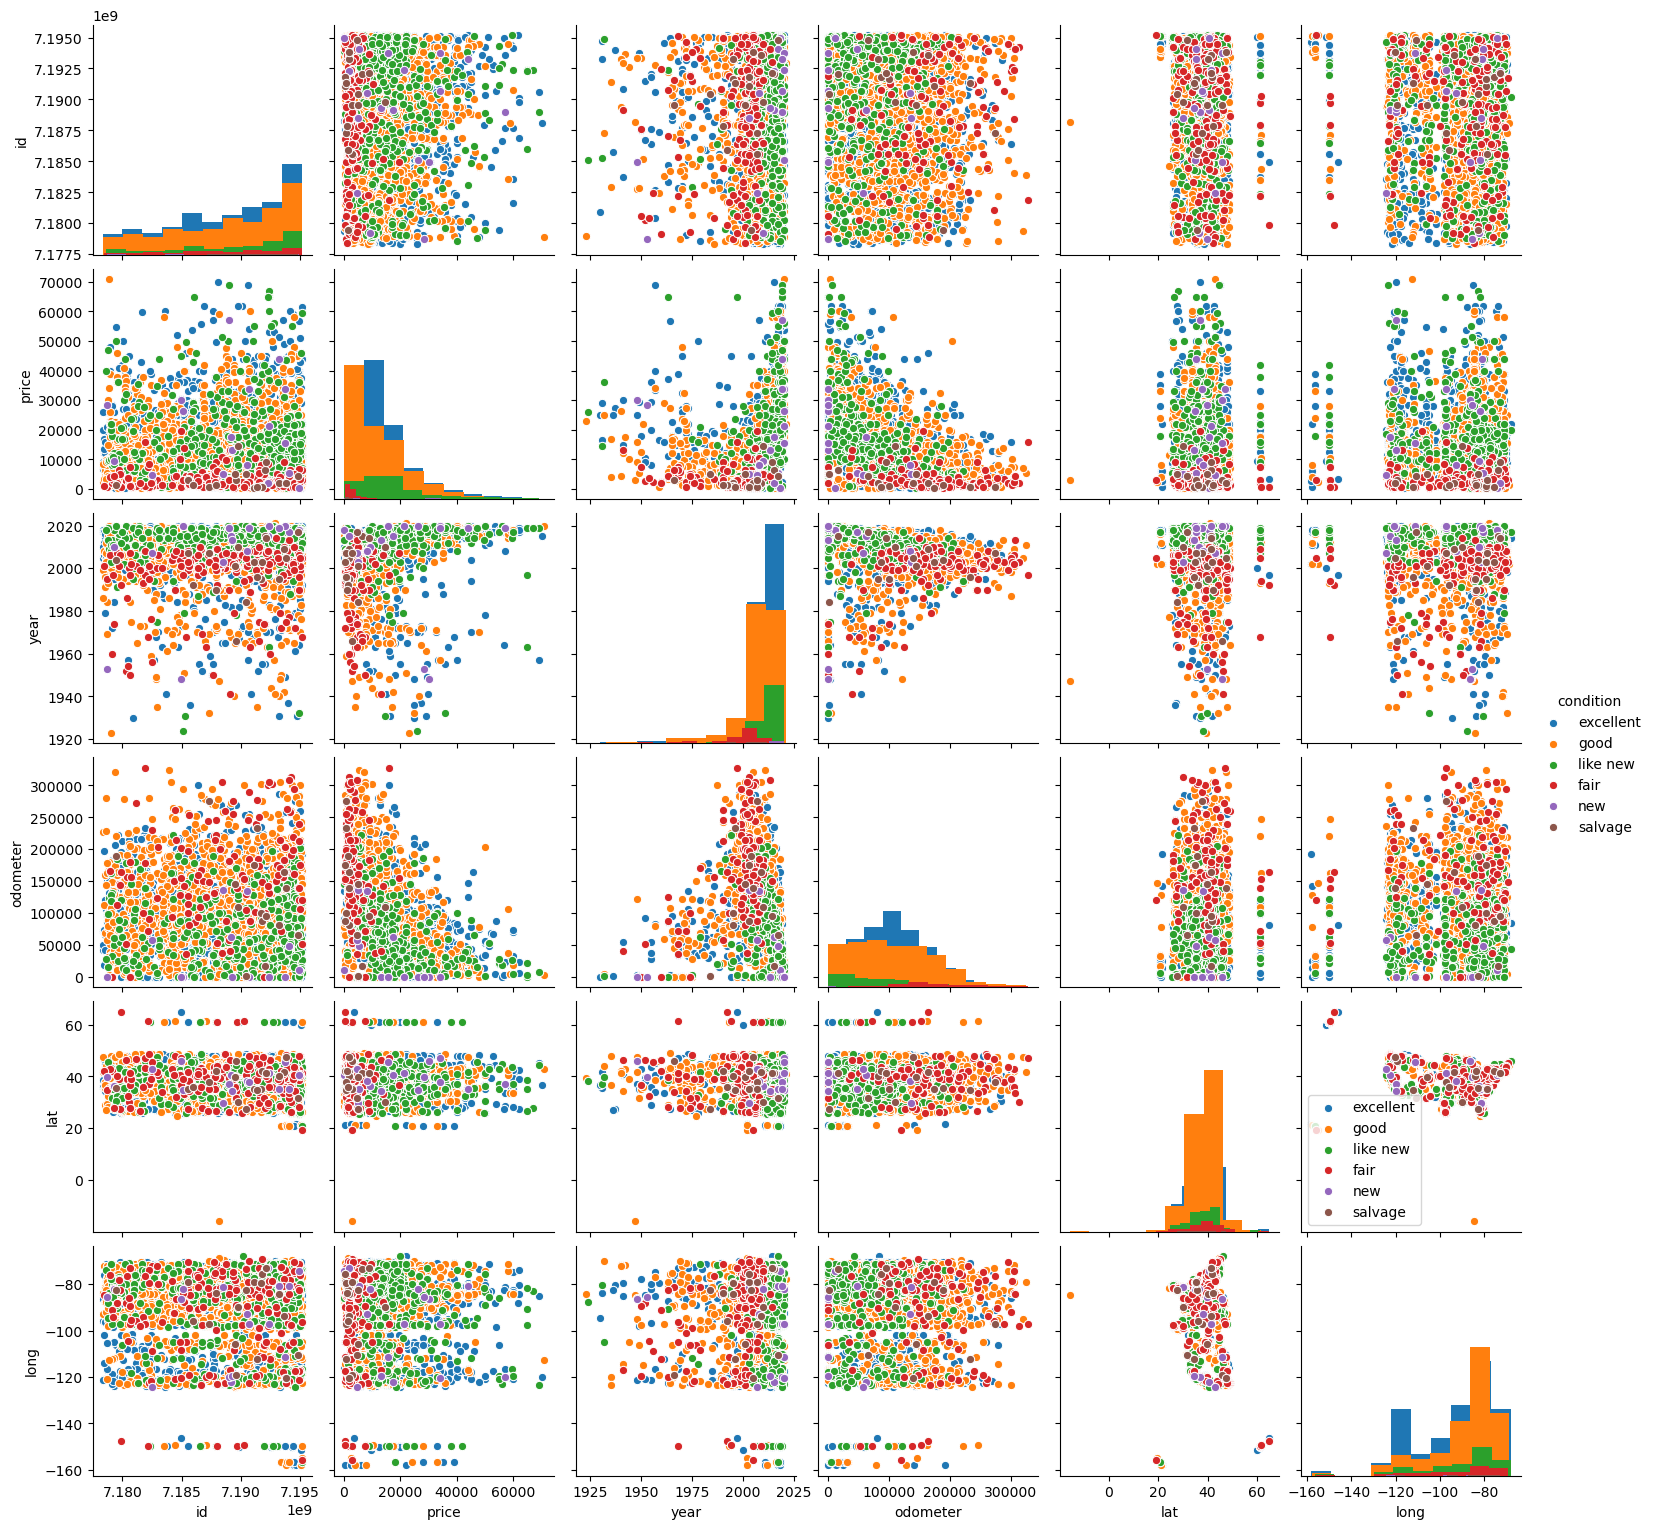

In [17]:
np.random.seed(73)
random_subset = np.random.choice(np.arange(clear_data.shape[0]), size=10000, replace=False)
sns.pairplot(clear_data.iloc[random_subset], hue='condition', diag_kind='hist')
plt.legend()
pass

Из диаграмм видно, что есть зависимости:
* цена/пробег
* цена/год
* пробег/год
* ширина/долгота

Так же можно посмотреть гистограммы для наших 3-х основных 

количественных признаков - стоимости, года и пробега

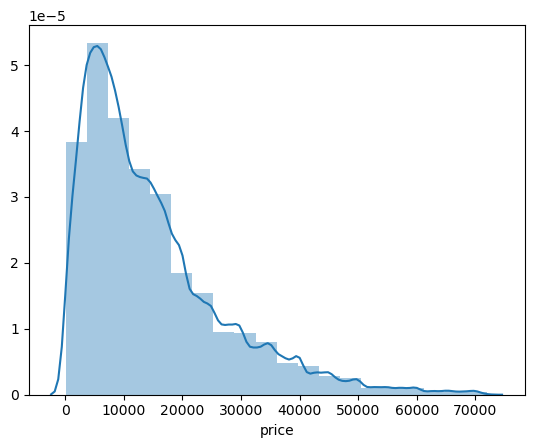

In [18]:
sns.distplot(clear_data['price'], bins = 20)
pass

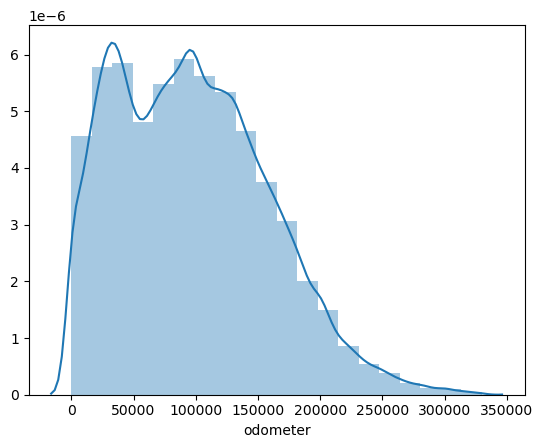

In [19]:
sns.distplot(clear_data['odometer'], bins = 20)
pass

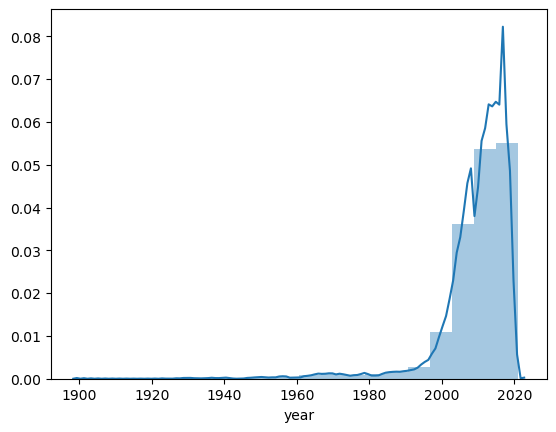

In [20]:
sns.distplot(clear_data['year'], bins = 20)
pass

##### Количественные признаки

Для более полного анализа данных, построим кореляционную матрицу и оценим степень зависимости количественных признаков друг от друга

In [21]:
corr_mat = clear_data.corr()
corr_mat

,id,price,year,odometer,lat,long
id,1.000000,-0.026316,0.011576,-0.006662,-0.071383,-0.048578
price,-0.026316,1.000000,0.305079,-0.511734,0.016911,-0.142259
year,0.011576,0.305079,1.000000,-0.368601,-0.009384,-0.052639
odometer,-0.006662,-0.511734,-0.368601,1.000000,0.006891,0.092702
lat,-0.071383,0.016911,-0.009384,0.006891,1.000000,-0.206862
long,-0.048578,-0.142259,-0.052639,0.092702,-0.206862,1.000000


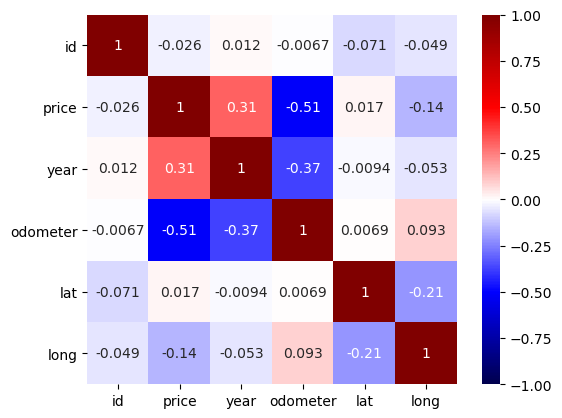

In [22]:
sns.heatmap(corr_mat, square=True, cmap='seismic', annot = True, vmin=-1, vmax=1, center= 0)
pass

In [23]:
corr_mat.where(np.triu(corr_mat > 0.2, k=1) | np.triu(corr_mat < -0.2, k=1)).stack().sort_values(ascending=False)

price  year        0.305079
lat    long       -0.206862
year   odometer   -0.368601
price  odometer   -0.511734
dtype: float64

Корреляция наблюдается у 4-х пар признаков:

| признак 1 | признак 2 | степень корреляции |
| ----- | ---- | -------------- |
| price | year |       0.305079 |
| lat   | long |     -0.206862  |
| year  | odometer |  -0.368601 |
| price | odometer |  -0.511734 |

Больше всего коррелируют цена и пробег, но значение корреляции все равно не очень большое, нужно так же проверить номинальные признаки, на возможные зависимости


##### Номинальные признаки

Рассмотрим балансы внутри классов данных:

In [24]:
clear_data['region'].value_counts() 

columbus                  3004
rochester                 2927
anchorage / mat-su        2909
omaha / council bluffs    2884
denver                    2874
                          ... 
kansas city                 15
meridian                    15
west virginia (old)         14
st louis                     5
fort smith, AR               1
Name: region, Length: 404, dtype: int64

In [25]:
clear_data['manufacturer'].value_counts() 

ford               53282
chevrolet          42145
toyota             23693
honda              17211
nissan             15704
jeep               12984
gmc                11630
dodge              10899
ram                10522
hyundai             7775
subaru              7590
bmw                 7092
volkswagen          6617
mercedes-benz       6211
kia                 6186
chrysler            5314
buick               4376
cadillac            4203
mazda               3604
lexus               3545
audi                2939
acura               2576
lincoln             2371
pontiac             2219
infiniti            2007
volvo               1889
mitsubishi          1757
mercury             1288
mini                1255
rover               1100
saturn              1043
jaguar               756
fiat                 495
tesla                270
alfa-romeo           126
harley-davidson      102
datsun                68
aston-martin          16
land rover            14
porche                 6


In [26]:
clear_data['model'].value_counts() 

f-150                         5307
silverado 1500                3413
escape                        2825
camry                         2602
1500                          2559
                              ... 
veloster silver                  1
Isuzu Ascender                   1
prius v two                      1
outlander se awd gas             1
Oldsmobile Delta 88 Royale       1
Name: model, Length: 25249, dtype: int64

In [27]:
clear_data['condition'].value_counts() 

excellent    78035
good         62107
like new     16428
fair          6496
new            870
salvage        485
Name: condition, dtype: int64

In [28]:
clear_data['cylinders'].value_counts() 

4 cylinders     64822
6 cylinders     64660
8 cylinders     48760
5 cylinders      1545
10 cylinders      719
other             673
3 cylinders       385
12 cylinders      127
Name: cylinders, dtype: int64

In [29]:
clear_data['fuel'].value_counts() 

gas         260888
diesel       20316
other         8902
hybrid        3427
electric       895
Name: fuel, dtype: int64

In [30]:
clear_data['title_status'].value_counts() 

clean         283253
rebuilt         5874
salvage         3164
lien            1919
missing          659
parts only       174
Name: title_status, dtype: int64

In [31]:
clear_data['transmission'].value_counts() 

automatic    263213
manual        21796
other         10436
Name: transmission, dtype: int64

In [32]:
clear_data['drive'].value_counts() 

4wd    89247
fwd    81600
rwd    38299
Name: drive, dtype: int64

In [33]:
clear_data['size'].value_counts()

full-size      47340
mid-size       28151
compact        14805
sub-compact     2368
Name: size, dtype: int64

In [34]:
clear_data['type'].value_counts()

sedan          58342
SUV            56132
truck          22754
pickup         22266
coupe          11708
other          10803
hatchback       8771
wagon           7562
van             6564
convertible     5445
mini-van        4898
offroad          504
bus              359
Name: type, dtype: int64

In [35]:
clear_data['paint_color'].value_counts()

white     51329
black     39855
silver    30045
blue      21254
red       20532
grey      20081
custom     5900
green      5618
brown      4324
yellow     1631
orange     1373
purple      657
Name: paint_color, dtype: int64

In [36]:
clear_data['state'].value_counts()

ca    40446
fl    25221
tx    20826
ny    16469
oh    15510
mi    15341
or    14088
wa    12636
wi    12139
nc    12075
pa    11412
co    11329
tn     9942
nj     9736
il     9147
id     8888
va     8638
mn     8413
ia     8410
az     7713
mt     7232
ma     6987
in     5713
ks     5509
ok     5402
sc     5393
ga     5009
al     4871
ct     4825
ky     4400
md     4090
mo     4029
ak     3893
nm     3812
ar     3426
nv     2938
nh     2780
hi     2701
la     2580
dc     2556
me     2516
ri     2389
vt     2316
ne     2056
sd     1628
ms     1285
ut      994
de      786
wy      774
wv      596
nd      421
Name: state, dtype: int64

По частоте вхождений данных, можно назвать 3 класса - несбаласированными:
* `transmission` - тип коробки передач

| transmission  | 295445 | % |
| ---- | ---- | --- |
| automatic   | 263213 | 89 |
| manual      |  21796 | 7 |
| other       |  10436 | 4 |

* `title_status` - официальный статус в государственном реестре 

| title_status  | 295043 | % |
| ---- | ---- | --- |
| clean |        283253 | 96 |
| rebuilt |        5874 | 2 |
| salvage |        3164 | 1 |
| lien    |        1919 | 0,6 |
| missing |         659 | 0,3 |
| parts only |      174 | 0,1 |

* `fuel` - тип двигателя

| fuel  | 294428 | % |
| ---- | ---- | --- |
| gas         | 260888 | 88,6 |
| diesel      | 20316  | 6,9 |
| other       |  8902  | 3 |
| hybrid      |  3427  | 1,1 |
| electric    |   895  | 0,4 |


Так же подробнее рассмотрим состояние машин, по котрому мы будем их классифицировать

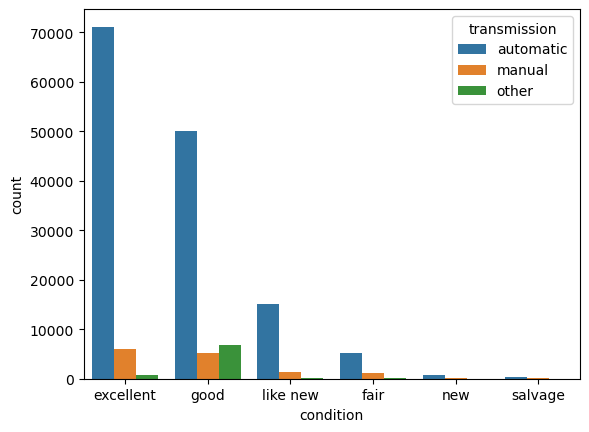

In [37]:
sns.countplot(x='condition', order=clear_data['condition'].value_counts().index, hue='transmission', data=clear_data)
pass

Видим что машины с коробками передач типа(вариатор или роботизированной) в большинстве случаев находятся в хорошем состоянии, значит это своеобразный индикатор, для более точного определения состояния машины, так же и тип двигателя имеет похожий вид гистограммы

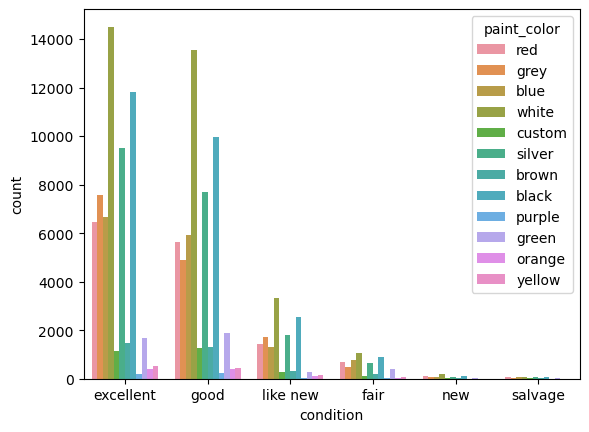

In [38]:
sns.countplot(x='condition', order=clear_data['condition'].value_counts().index, hue='paint_color', data=clear_data)
pass

а вот цвет машины почти ничего не может сказать о ее состоянии, похожая картина получается при рассмотрении состояния с признаками `type`, `size`, `drive`, `cylinders`

Также посмотрим информацию о характере распределения состояния от цены/года и пробега автомобиля

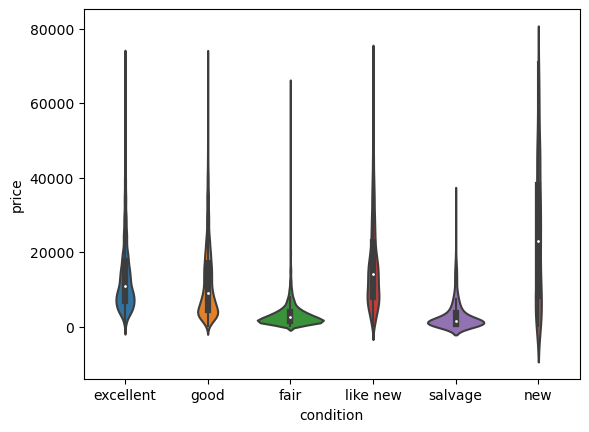

In [39]:
sns.violinplot(x="condition", y="price", data=clear_data)
pass

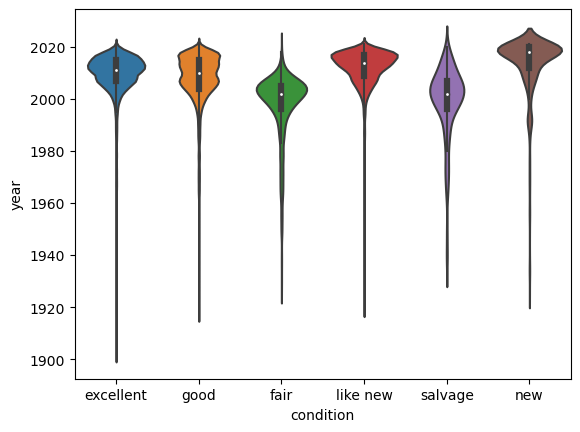

In [40]:
sns.violinplot(x="condition", y="year", data=clear_data)
pass

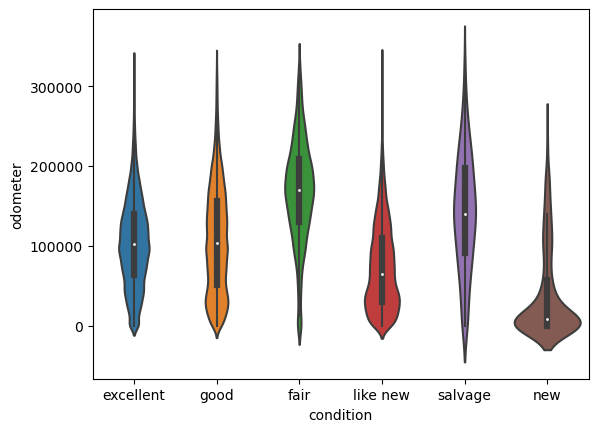

In [41]:
sns.violinplot(x="condition", y="odometer", data=clear_data)
pass

## 4 Обработка пропущенных значений
***
Посмотрим на число пропущенных значений в каждом столбце

In [302]:
clear_data.shape

(382286, 24)

In [303]:
clear_data.isna().sum()  

id                   0
url                  0
region               0
region_url           0
price                0
year             86567
manufacturer     99397
model            89451
condition       217865
cylinders       200595
fuel             87858
odometer        137091
title_status     87243
transmission     86841
vin             219156
drive           173140
size            289622
type            166178
paint_color     179687
image_url        85678
description      85685
state                0
lat              87566
long             87566
dtype: int64

В нашем признаке состояния машины находится 217865 (57%) пропущенных значений, что ставит вопрос о том как правильно обработать эти значения? 

Первый вариант - просто удалить эти данные, оставив 43% данных для обучения модели

Второй - заместить средним все показатели, кроме самого класса и так же удалить только те строки, значение класса в которых для нас не известно

В любом случае статистическая мощность будет уменьшаться, и на данном этапе невозможно предсказать какой из методов покажет себя лучше, поэтому будем использовать 2 параллельных набора данных с 2-мя типами обработки пропущенных значений `delete_data` и `predict_data`, и посмотрим как в итоге это повлияет на ошибку при обучении модели

Так же столбцы, `url`, `region_url`, `image_url`, `description`, `vin` не имеют особого смысла для модели, а так же их будет очень сложно бинаризовать для дальнейшего обучения, поэтому удалим их на этом этапе

##### обработка номинальных признаков

In [469]:
import copy

predict_data = copy.deepcopy(clear_data)
predict_data.drop(['url','region_url','image_url','description','vin'], axis='columns', inplace=True)
predict_data.fillna(predict_data.median(axis = 0), axis=0 , inplace=True)

In [470]:
predict_data.isna().sum()  

id                   0
region               0
price                0
year                 0
manufacturer     99397
model            89451
condition       217865
cylinders       200595
fuel             87858
odometer             0
title_status     87243
transmission     86841
drive           173140
size            289622
type            166178
paint_color     179687
state                0
lat                  0
long                 0
dtype: int64

##### обработка категориальных признаков

In [471]:
predict_data['manufacturer'].fillna(predict_data['manufacturer'].mode().iloc[0], inplace=True)
predict_data['model'].fillna(predict_data['model'].mode().iloc[0], inplace=True)
predict_data['cylinders'].fillna(predict_data['cylinders'].mode().iloc[0], inplace=True)
predict_data['fuel'].fillna(predict_data['fuel'].mode().iloc[0], inplace=True)
predict_data['title_status'].fillna(predict_data['title_status'].mode().iloc[0], inplace=True)
predict_data['transmission'].fillna(predict_data['transmission'].mode().iloc[0], inplace=True)
predict_data['drive'].fillna(predict_data['drive'].mode().iloc[0], inplace=True)
predict_data['size'].fillna(predict_data['size'].mode().iloc[0], inplace=True)
predict_data['type'].fillna(predict_data['type'].mode().iloc[0], inplace=True)
predict_data['paint_color'].fillna(predict_data['paint_color'].mode().iloc[0], inplace=True)

In [472]:
predict_data.isna().sum()  

id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition       217865
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
size                 0
type                 0
paint_color          0
state                0
lat                  0
long                 0
dtype: int64

И последним шагом, оставляем в наших данных только те, значение класса для которых нам известно

In [473]:
predict_data.dropna(inplace=True)

In [474]:
predict_data.shape

(164421, 19)

##### Исключение пропущенных значений
Соберем второй датасет, не используя принцип замены показателей

In [475]:
delete_data = copy.deepcopy(clear_data)
delete_data.drop(['url','region_url','image_url','description','vin'], axis='columns', inplace=True)

А теперь удалим все встроки с вхождением пропущенных значений

In [476]:
delete_data.dropna(inplace=True)

In [477]:
delete_data.shape

(57930, 19)

## 5 Обработка категореальных признаков
***
Для алгоритмов нам потребуется провести бинаризацию данных для всех категориальных признаков, особое внимание нужно обратить на столбец - `model` и `region` содеращие большое количество уникальных признаков, и имеющие написание в формате предложения, а не одного слова. 

In [478]:
delete_data['model'].value_counts()

f-150                   1046
silverado 1500           906
1500                     526
camry                    447
accord                   439
                        ... 
5500 diesel dump           1
frontier le crewcab        1
montana van                1
f-350 crew cab dump        1
passat 1.8t se sedan       1
Name: model, Length: 8158, dtype: int64

In [479]:
predict_data['model'].value_counts()

f-150                        3884
silverado 1500               1822
camry                        1259
accord                       1202
1500                         1153
                             ... 
xdrive35i premium awd           1
dogde 3500                      1
veloster n coupe 3d             1
CHYSLER                         1
express 3500 ,shuttle van       1
Name: model, Length: 18239, dtype: int64

In [480]:
count_cloud = set()

for val in predict_data['model']:      
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
        count_cloud.add(tokens[i])

model_dummies = pd.DataFrame(count_cloud).T
model_dummies.rename(columns=model_dummies.iloc[0], inplace=True)
model_dummies.iloc[0] = 0

"""
import re
def substr(word, words):
    list=(re.findall(r"[\w']+", words))
    if word in list:
        return 1
    else:
        return 0

for i in range(predict_data['model'].size):
    for j in range(len(count_cloud)):
        model_dummies.at[i,model_dummies.columns[j]] = substr(model_dummies.columns[j],predict_data['model'].iloc[i])
"""

model_dummies

,option,blacktop,lacross,mitsibishi,nissian,2500-hd,mercerdes,lairat,1.9t,countryman,...,arm,flatbed/stakebody,champion,crx,stratus,...,kiaoptima,hybrid,k20,slt2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Данная функция собирает облако уникальных слов содержащихся в параметре, и создает для нее pandas dataframe с фиктивными dummy-признаками, но к сожалению выходная размерность облака слов - `6183`, а число строк `predict_data - 164421`, очень велики, из-за чего не удается бинаризировать признак `model`, а так же и признак `region` на размерностях - `497 * 57930`

В данной работе, эти признаки так же придется убрать из рассмотрения.

In [481]:
delete_data.drop(['model','region'], axis='columns', inplace=True)

In [482]:
predict_data.drop(['model','region'], axis='columns', inplace=True)

А вот с оставшимися категориальными признаками, проводим бинаризацию

In [483]:
def dummies(name, data):
    return_data = data
    return_data[name] = return_data[name].astype('category')
    p_dummies = pd.get_dummies(return_data[name])   
    return_data = pd.concat([return_data, p_dummies], axis=1)
    return return_data

predict_data = dummies('state', predict_data)    
predict_data = dummies('manufacturer', predict_data)
predict_data = dummies('cylinders', predict_data)
predict_data = dummies('fuel', predict_data)
predict_data = dummies('title_status', predict_data)
predict_data = dummies('transmission', predict_data)
predict_data = dummies('drive', predict_data)
predict_data = dummies('size', predict_data)
predict_data = dummies('type', predict_data)
predict_data = dummies('paint_color', predict_data)

predict_data.drop(['state','manufacturer','cylinders','fuel','title_status',
                   'transmission','drive','size','type',
                   'paint_color'], axis='columns', inplace=True)


In [484]:
predict_data.describe()

,id,price,year,odometer,lat,long,ak,al,ar,az,...,brown,custom,green,grey,orange,purple,red,silver,white,yellow
count,1.644210e+05,164421.000000,164421.000000,164421.000000,164421.000000,164421.000000,164421.000000,164421.000000,164421.000000,164421.000000,...,164421.000000,164421.000000,164421.000000,164421.000000,164421.000000,164421.000000,164421.000000,164421.000000,164421.000000,164421.000000
mean,7.189013e+09,13106.066184,2008.340924,102699.514807,38.474227,-91.644458,0.007250,0.013459,0.008861,0.015016,...,0.020265,0.017273,0.026128,0.089995,0.005772,0.003059,0.087410,0.120642,0.377671,0.007292
std,4.750097e+06,10745.561300,10.727135,57877.846422,5.460682,16.765296,0.084836,0.115231,0.093717,0.121618,...,0.140906,0.130286,0.159517,0.286175,0.075753,0.055226,0.282435,0.325711,0.484806,0.085083
min,7.178302e+09,147.000000,1901.000000,0.000000,-56.527000,-161.394000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.185453e+09,5495.000000,2005.000000,63500.000000,35.035100,-97.959100,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.189939e+09,9995.000000,2011.000000,93321.000000,39.289100,-85.980000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.193257e+09,17500.000000,2015.000000,138000.000000,42.237500,-80.178500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7.195225e+09,71995.000000,2021.000000,330000.000000,80.383400,94.163200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [485]:
predict_data.shape

(164421, 154)

In [486]:
delete_data = dummies('state', delete_data)    
delete_data = dummies('manufacturer', delete_data)
delete_data = dummies('cylinders', delete_data)
delete_data = dummies('fuel', delete_data)
delete_data = dummies('title_status', delete_data)
delete_data = dummies('transmission', delete_data)
delete_data = dummies('drive', delete_data)
delete_data = dummies('size', delete_data)
delete_data = dummies('type', delete_data)
delete_data = dummies('paint_color', delete_data)

delete_data.drop(['state','manufacturer','cylinders','fuel','title_status',
                   'transmission','drive','size','type',
                   'paint_color'], axis='columns', inplace=True)

In [487]:
delete_data.shape

(57930, 152)

## 6 Нормализация и деление на выборки
***
Так же нормализуем полученные данные, что бы большие величины, не внесли больше вклада в веса сети, чем следовало бы


Для каждого набора данных возьем пропорциональное количество данных - 

75%/25% для обучения и тестовых, что бы точнее сравнить результат 

In [488]:
y1 = predict_data['condition']
y2 = delete_data['condition']

predict_data.drop(['condition'], axis='columns', inplace=True)
delete_data.drop(['condition'], axis='columns', inplace=True)

In [489]:
x1 = (predict_data - predict_data.mean(axis = 0))/predict_data.std(axis = 0)
x2 = (delete_data - delete_data.mean(axis = 0))/delete_data.std(axis = 0)

In [490]:
x1.describe()

,id,price,year,odometer,lat,long,ak,al,ar,az,...,brown,custom,green,grey,orange,purple,red,silver,white,yellow
count,1.644210e+05,1.644210e+05,1.644210e+05,1.644210e+05,1.644210e+05,1.644210e+05,1.644210e+05,1.644210e+05,1.644210e+05,1.644210e+05,...,1.644210e+05,1.644210e+05,1.644210e+05,1.644210e+05,1.644210e+05,1.644210e+05,1.644210e+05,1.644210e+05,1.644210e+05,1.644210e+05
mean,9.030151e-14,-1.702915e-16,-5.906868e-15,-1.403091e-15,4.970213e-13,6.880326e-13,1.420974e-14,6.321580e-14,-4.648621e-15,-1.712496e-14,...,-1.236668e-15,1.979560e-16,2.722072e-15,1.389951e-16,1.194690e-15,-5.852259e-15,3.090985e-15,3.169721e-16,-5.560169e-15,-1.291272e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.254880e+00,-1.205992e+00,-1.000649e+01,-1.774418e+00,-1.739732e+01,-4.160353e+00,-8.545513e-02,-1.168028e-01,-9.455459e-02,-1.234713e-01,...,-1.438197e-01,-1.325753e-01,-1.637952e-01,-3.144741e-01,-7.619213e-02,-5.539484e-02,-3.094858e-01,-3.703941e-01,-7.790139e-01,-8.570752e-02
25%,-7.493189e-01,-7.082986e-01,-3.114460e-01,-6.772801e-01,-6.297982e-01,-3.766496e-01,-8.545513e-02,-1.168028e-01,-9.455459e-02,-1.234713e-01,...,-1.438197e-01,-1.325753e-01,-1.637952e-01,-3.144741e-01,-7.619213e-02,-5.539484e-02,-3.094858e-01,-3.703941e-01,-7.790139e-01,-8.570752e-02
50%,1.950782e-01,-2.895210e-01,2.478832e-01,-1.620398e-01,1.492254e-01,3.378680e-01,-8.545513e-02,-1.168028e-01,-9.455459e-02,-1.234713e-01,...,-1.438197e-01,-1.325753e-01,-1.637952e-01,-3.144741e-01,-7.619213e-02,-5.539484e-02,-3.094858e-01,-3.703941e-01,-7.790139e-01,-8.570752e-02
75%,8.934811e-01,4.089069e-01,6.207693e-01,6.099136e-01,6.891580e-01,6.839103e-01,-8.545513e-02,-1.168028e-01,-9.455459e-02,-1.234713e-01,...,-1.438197e-01,-1.325753e-01,-1.637952e-01,-3.144741e-01,-7.619213e-02,-5.539484e-02,-3.094858e-01,-3.703941e-01,1.283666e+00,-8.570752e-02
max,1.307876e+00,5.480303e+00,1.180099e+00,3.927245e+00,7.674714e+00,1.108287e+01,1.170198e+01,8.561387e+00,1.057584e+01,8.098998e+00,...,6.953110e+00,7.542836e+00,6.105147e+00,3.179893e+00,1.312464e+01,1.805211e+01,3.231146e+00,2.699810e+00,1.283666e+00,1.166752e+01


In [491]:
x1 = x1.to_numpy()
x2 = x2.to_numpy()

In [492]:
y1 = y1.replace(['excellent','new','like new','good','fair','salvage'], [6, 5, 4, 3, 2, 1])
y2 = y2.replace(['excellent','new','like new','good','fair','salvage'], [6, 5, 4, 3, 2, 1])

In [493]:
y1

0         6
1         6
2         3
3         3
4         3
         ..
423851    3
423852    2
423853    6
423854    2
423855    6
Name: condition, Length: 164421, dtype: int64

In [494]:
y1 = y1.to_numpy()
y2 = y2.to_numpy()

In [495]:
y2

array([3, 3, 3, ..., 1, 3, 6])

Разбиваем данные на обучающие выборки:

In [496]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.25, random_state = 73)

N1_train, _ = X1_train.shape 
N1_test,  _ = X1_test.shape 

N1_train, N1_test

(123315, 41106)

In [497]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.25, random_state = 73)

N2_train, _ = X2_train.shape 
N2_test,  _ = X2_test.shape 

N2_train, N2_test

(43447, 14483)

## 7. Классификатор ближайших соседей

Запустим классифифкатор ближайших N соседей

In [498]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn1.fit(X1_train, y1_train)

KNeighborsClassifier(n_neighbors=10)

In [499]:
knn1

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y1_test_predict = knn1.predict(X1_test)
err_test1  = np.mean(y1_test  != y1_test_predict)

In [ ]:
err_test

## 8. Ошибки и выводы

Для к 

In [ ]:
y1 = stand_predict_data['Price']
X1 = stand_predict_data.drop(['Date'], axis=1)